# Customer churn prediction for a telecommunications company

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [208]:
df = pd.read_csv('datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
df.duplicated().sum()

0

In [33]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [35]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [209]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges.dtype

dtype('float64')

In [210]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [211]:
# Drop nulls in TotalCharges

df.dropna(subset=['TotalCharges'], inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

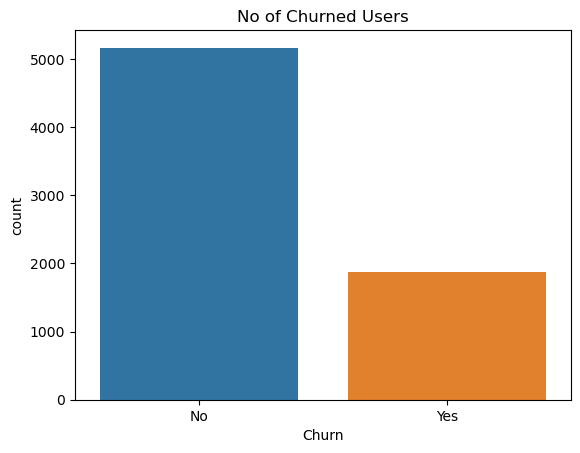

In [41]:
# How many users churned?

plt.figure()
sns.countplot(x='Churn', data=df)

plt.title('No of Churned Users');

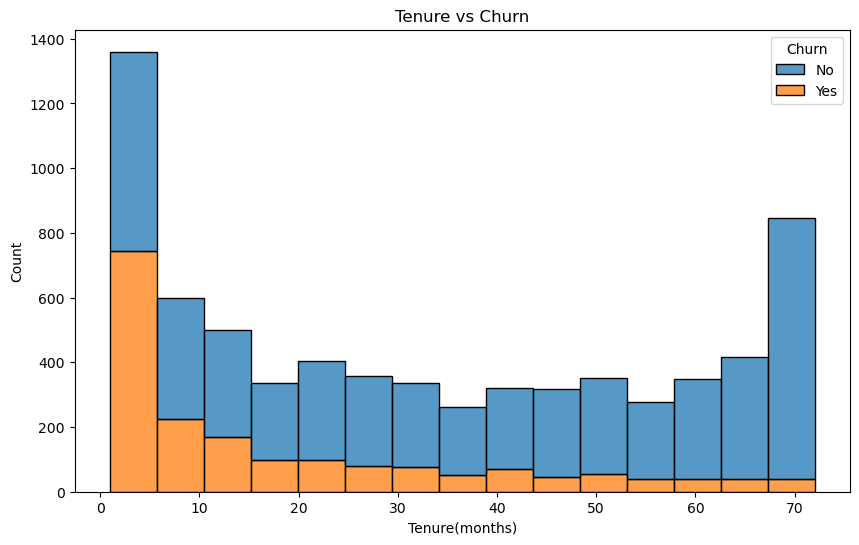

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(x='tenure', hue='Churn', data=df, multiple='stack');

plt.xlabel('Tenure(months)')
plt.title('Tenure vs Churn');

In [43]:
# Customers with shorter tenure are more likely to churn
# The likelihood of churn decreases with increase in tenure

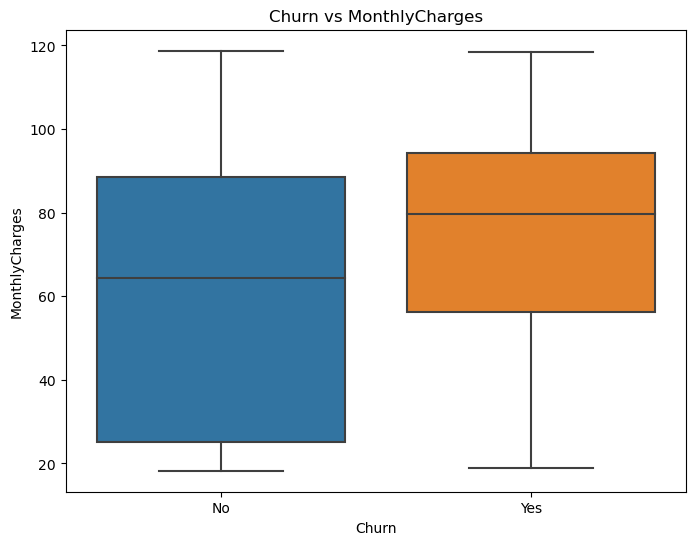

In [44]:
# Monthly charges vs Churn

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df);
plt.title('Churn vs MonthlyCharges');

In [45]:
# Customers have higher monthly charges tend to churn.
# The median monthly charge of churned customers is higher than those who non-churners

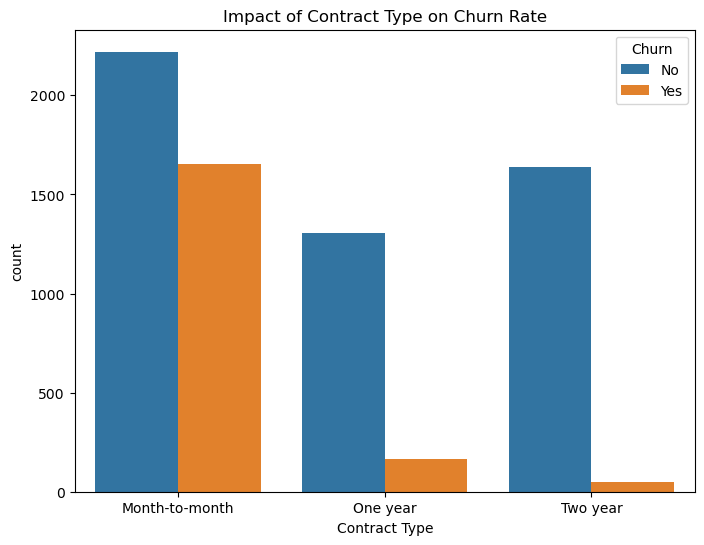

In [46]:
# The impact of contract type on churn

plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df);
plt.title('Impact of Contract Type on Churn Rate')
plt.xlabel('Contract Type');

In [47]:
# Customers with m-to-m contracts are most likely to churn
# Longer contracts have LOWER churn rates

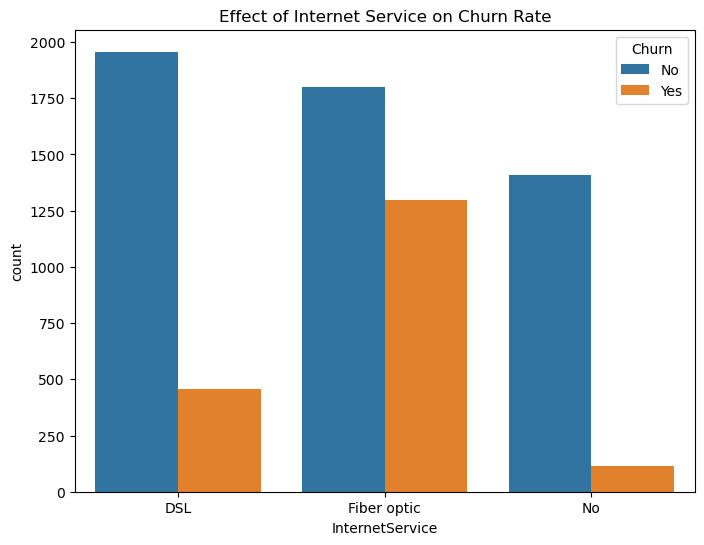

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)

plt.title('Effect of Internet Service on Churn Rate')
plt.xlabel('InternetService');

In [49]:
# Customers using the Fibre Optic service tend to have higher churn rates

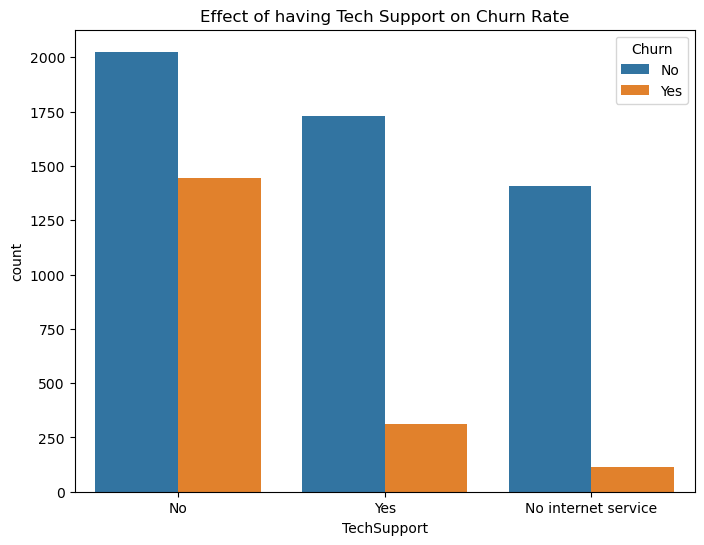

In [50]:
plt.figure(figsize=(8, 6))
plt.title('Effect of having Tech Support on Churn Rate');

sns.countplot(x='TechSupport', hue='Churn', data=df);

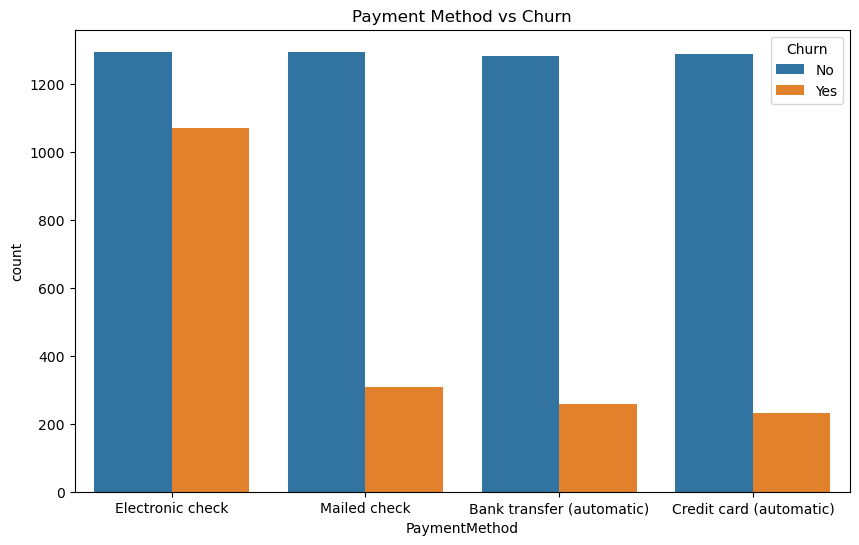

In [51]:
plt.figure(figsize=(10, 6))
plt.title('Payment Method vs Churn');
sns.countplot(x='PaymentMethod', hue='Churn', data=df);

In [52]:
# Customers using the Electronic Check payment method have a higher churn

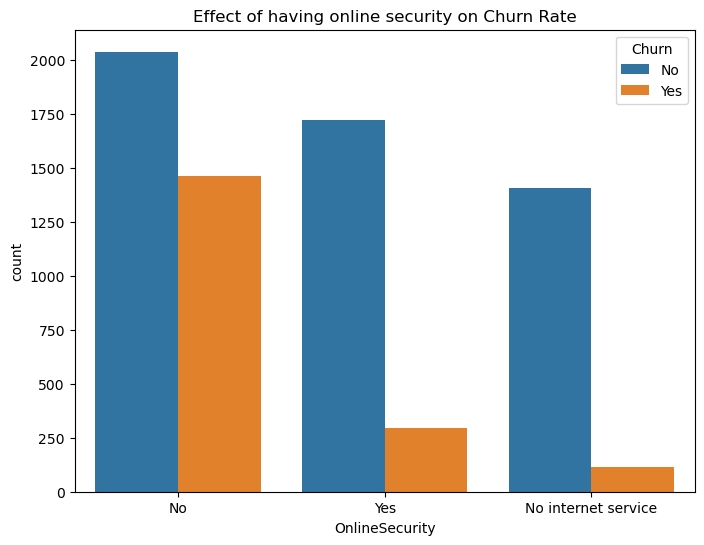

In [53]:
plt.figure(figsize=(8, 6))

sns.countplot(x='OnlineSecurity', hue='Churn', data=df);
plt.title('Effect of having online security on Churn Rate');

In [54]:
# Customers with no online security have a high tendency to churn

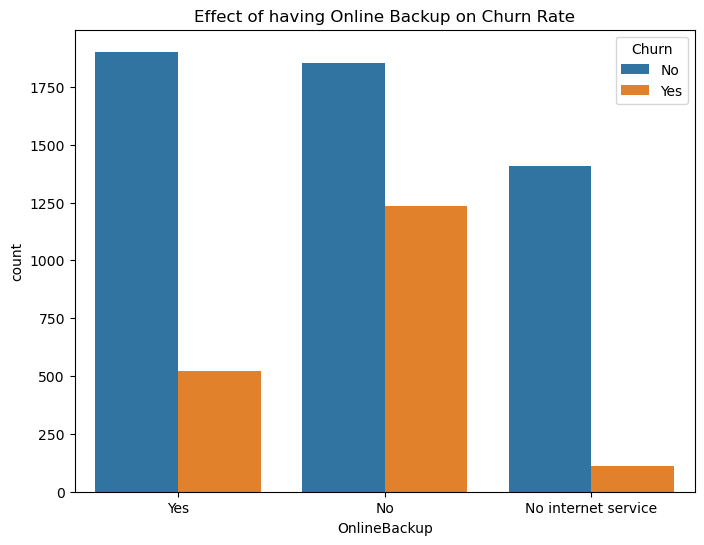

In [55]:
plt.figure(figsize=(8, 6))

sns.countplot(x='OnlineBackup', hue='Churn', data=df);
plt.title('Effect of having Online Backup on Churn Rate');

In [56]:
# Customers not having online backup are likely to churn

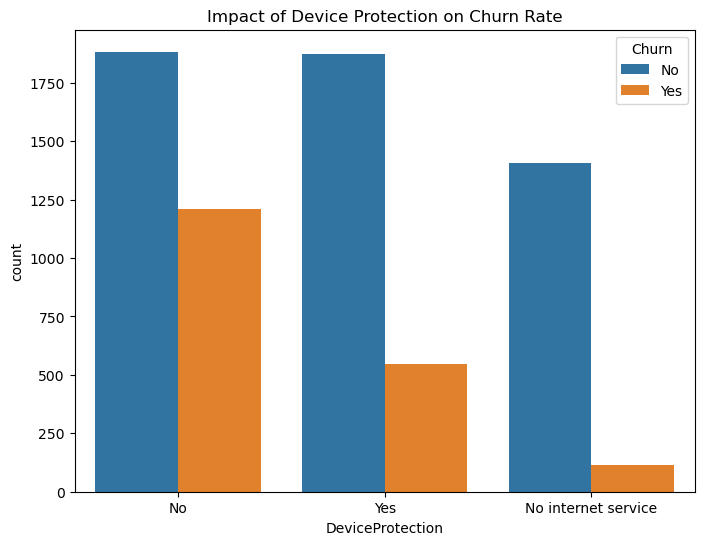

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(x='DeviceProtection', hue='Churn', data=df);
plt.title('Impact of Device Protection on Churn Rate');

In [34]:
# Customers with no device protection are likely to churn

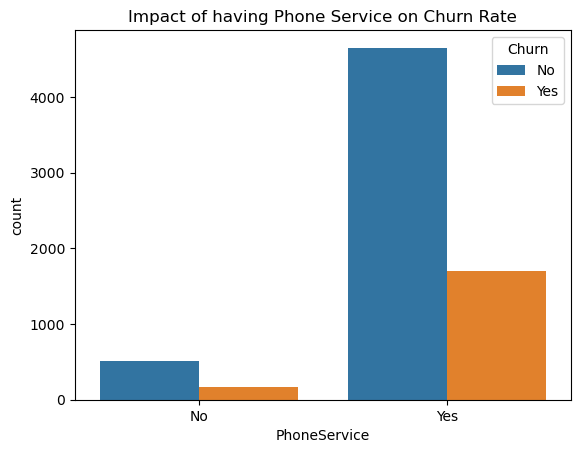

In [59]:
sns.countplot(x='PhoneService', hue='Churn', data=df);
plt.title('Impact of having Phone Service on Churn Rate');

In [60]:
# Customers who have phone service have a higher tendency to churn than those who don't.

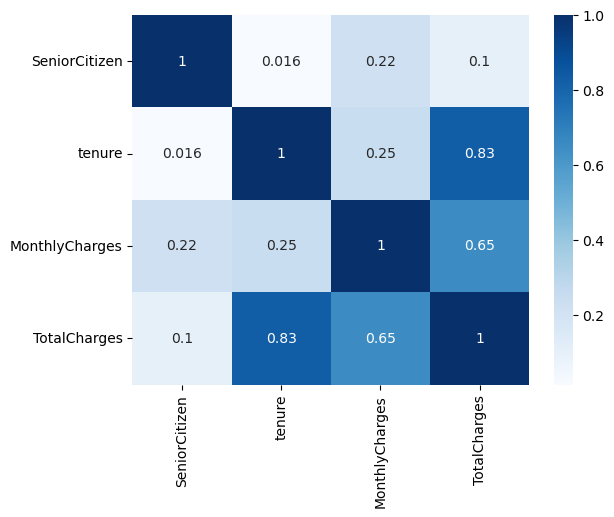

In [61]:
sns.heatmap(df.select_dtypes(['int', 'float']).corr(), annot=True, cmap='Blues');

## Feature Engineering

In [212]:
unwanted_cols = ['customerID'] + ['gender',
 'SeniorCitizen',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'DeviceProtection',
 'StreamingTV',
 'StreamingMovies'] + ['Partner', 'Dependents']

df = df.drop(unwanted_cols, axis=1)

df.head()

,tenure,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,No,Yes,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,34,Yes,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Yes,Yes,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,45,Yes,No,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,2,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [213]:
from sklearn.preprocessing import LabelEncoder

In [214]:
# Encode categorical columns

lenc = LabelEncoder()

for col in df.select_dtypes('object'):
    df[col] = lenc.fit_transform(df[col])

In [215]:
df.head()

,tenure,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,2,0,0,1,2,29.85,29.85,0
1,34,2,0,0,1,0,3,56.95,1889.50,0
2,2,2,2,0,0,1,3,53.85,108.15,1
3,45,2,0,2,1,0,0,42.30,1840.75,0
4,2,0,0,0,0,1,2,70.70,151.65,1


In [216]:
# Select features & target
X = df.drop(columns='Churn')
y = df.Churn

In [217]:
# Check data imbalance
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
# Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=52)

In [220]:
from imblearn.over_sampling import SMOTE

In [221]:
# Oversample data in minority class
SMOTER = SMOTE(random_state=41)
X_train_smoted, y_train_smoted = SMOTER.fit_resample(X_train, y_train)

In [222]:
y_train_smoted.value_counts()

Churn
1    4126
0    4126
Name: count, dtype: int64

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [224]:
# Train the Random Forest classifier
forest = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=44)
forest.fit(X_train_smoted, y_train_smoted)

RandomForestClassifier(max_depth=100, random_state=44)

In [225]:
# Predict test data
y_pred = forest.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [226]:
# Classification accuracy
metrics.accuracy_score(y_test, y_pred)

0.7846481876332623

In [227]:
metrics.f1_score(y_test, y_pred)

0.5563689604685212

In [228]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1037
           1       0.61      0.51      0.56       370

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [229]:
# Confusion metrics
metrics.confusion_matrix(y_test, y_pred)

array([[914, 123],
       [180, 190]], dtype=int64)

In [230]:
# Feature importances judged by Random Forest model
forest.feature_importances_

array([0.13610317, 0.0990704 , 0.03954912, 0.08656122, 0.17571094,
       0.06261411, 0.06493431, 0.17036892, 0.16508781])

In [232]:
# Format and view 10 most important features
fmt = lambda x: f'{int(x*100)}%'
feature_importances = pd.DataFrame({ 'features': X.columns,
                                    'importance': forest.feature_importances_,
                                    'formatted_importance': map(fmt, forest.feature_importances_)}) 
feature_importances.sort_values('importance', ascending=False)

,features,importance,formatted_importance
4,Contract,0.175711,17%
7,MonthlyCharges,0.170369,17%
8,TotalCharges,0.165088,16%
0,tenure,0.136103,13%
1,OnlineSecurity,0.099070,9%
3,TechSupport,0.086561,8%
6,PaymentMethod,0.064934,6%
5,PaperlessBilling,0.062614,6%
2,OnlineBackup,0.039549,3%


In [233]:
feature_importances.loc[feature_importances.importance < 0.04, 'features'].tolist()

['OnlineBackup']

# Using Logistic Regression

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [235]:
logmodel = LogisticRegression()
logmodel.fit(X_train_smoted, y_train_smoted)

C:\Users\Chima Orji\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [236]:
y_pred_log = logmodel.predict(X_test)
y_pred_log

array([0, 1, 0, ..., 0, 1, 0])

In [237]:
metrics.accuracy_score(y_test, y_pred_log)

0.7427149964463398

In [238]:
print(metrics.classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1037
           1       0.51      0.80      0.62       370

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407



In [239]:
# Conclusion: The Random Forest model is a better model!

In [240]:
interpret_pred = lambda val: 'CHURN' if val else 'WONT_CHURN'

In [241]:
def predict_churn(val):
    return [interpret_pred(pred) for pred in forest.predict(val)]

In [242]:
val = df.loc[df.Churn==1].drop('Churn', axis=1).iloc[:1, :].values

print(predict_churn(val))
val

['CHURN']


array([[  2.  ,   2.  ,   2.  ,   0.  ,   0.  ,   1.  ,   3.  ,  53.85,
        108.15]])

In [170]:
from joblib import load, dump

In [171]:
dump(forest, 'forest_churn_79.pkl')

['forest_churn_79.pkl']